# Concept Learning & *k*-Nearest Neighbor

First, we will explore the idea of concept learning, which will be the foundation for conceptually understanding how we think about machine learning problems.

Next, we will extract a popular toy dataset from a machine learning toolkit, SciKit Learn, and use Python to explore the structure of a dataset.

Finally, we will introduce and apply our first elementary machine learning algorithm, *k*-Nearest Neighbor (kNN), to make simple predictions on an extracted dataset. While not practical in all but simple applications, understanding how kNN works will give us an intuition behind how concepts are learned, and how novel inputs are classified. kNN is a supervised algorithm, typically used for classification or regression problems.

## Concept Learning

To **learn** a concept is to come up with a way of describing a general rule from a set of known examples. Before we can understand what it means to learn a concept, we need to make a few definitons, specifically what a concept and class is.

A **concept** describes or defines a thing, or type of thing. For example, if we can understand the concept of a bicycle (number of wheels, mass, height, top speed, etc...), and we are given a bunch of other objects, like bicycles, cars, and houses, then the concept of a bicycle is sufficient to let us determine which objects are bicycles, and which are not. What type or amount of information is needed to fully specify a concept will depend on the problem domain, and the representation of information for that domain.

A **class** is a group defined by a concept. Classes are identified by a label unique to the concept the class matches. We assign the label "bicycle" to all things in the bicycle class, where the bicycle class is made up of all the objects in the domain that match the bicycle concept.

A **classification algorithm** takes concrete examples, and provides a class label for each example. Ideally, the class label is associated with the concept the label belongs to. If so, this is a true classification, otherwise it is false.

A **classifier** is a model that performs a classification based on an algorithm definition. Given an example input, we expect the classifier to return a label with some degree of accuracy, and within a reasonable amount of time.

Finally, we can define **concept learning** as a task, given a set of examples of which we know the labels, that generates a classifier to label any example (not just the ones we've already seen). In the next subsections we will talk about different types of learning that extend classifying labeled datasets.

### Supervised Learning

Supervised learning is the process of learning from a sufficiently large set of examples with associated classes. If we have pre-labeled data to use, then this is the ideal form of learning, because we need some kind of 'supervisor' to tell us the correct label for each example we use for learning.

#### Classification

This is concept learning from our definition above. Eﬀectively speaking, so long as the expected output classes are discrete (ie. it is an element of a ﬁnite set), we can treat it as a classiﬁcation problem, regardless of how the discrete values are interpreted after we’re done.

#### Regression

This is function approximation. We use this form of learning when tasks require a numeric output of real-valued numbers. This can be defined as a single numeric value, or as a **vector**, which is a multi-variate numeric output. Estimation, or predictive modeling typically fall into this category.

### Unsupervised Learning

If we have a lot of examples but no labels for them, we can use unsupervised learning. The goal of unsupervised learning is to 'invent' a useful set of classes that fit the data well, often called **clustering**. We try to find well-separated, compact clusters of data, and hypthesize that these clusters represent different classes. We could also attempt to build a model of the underlying distribution the data is sampled from, or perhaps discover a structure to the data that would be useful.

### Reinforcement Learning

Reinforcement learning is generally useful for problems where we don't know what the correct action to take from a given state is. For example, looking at the state of an array of sensor values to determine what a robot should do next is difficult, but we can give a *reward* signal saying whether or not the given state is desirable to be in or not (ie. if the robot crashes it is in a bad state, but if it brings us a beer it will be rewarded, and in a good state). Over time, the model can use reward signals to learn how to make good decisions in an environment. Any discrete set of of actions a model can choose to make is synonymous with a standard classification problem.

[Here](https://www.youtube.com/watch?v=Lt-KLtkDlh8) is an interesting demonstration of reinforcement learning. Over many iterations of receiving positive reward signals, the robot is able to account for disturbances in it's environment and self-correct.

### Minimally-Supervised Learning

Minimally-supervised learning is a hybrid learning technique where we only have a small set of labeled examples, and a larger set of unlabeled examples. In this case, we use the small number of examples we have to attempt to label some of the unlabeled examples, add them to the set of labeled examples, and repeat. We repeat this process until we have enough samples to perform supervised learning. The advantage of this technique is we don't have to label all of the examples by hand; however, the disadvantage is the accuracy of the labels is generally lower than if we hand labeled each example.

For the first few lessons we will exclusively work with supervised learning algorithms, as they are the easiest to grasp, and will help us gain intuition behind why other techniques are required.

There are many standard model frameworks for performing supervised classification or regression, each with their own pros and cons. Here is a list of commonly used frameworks we will cover:
- *k*-nearest neighbor (kNN)
- support vector machine (SVM)
- decision tree
- Na&iuml;ve Bayes
- artificial neural networks

We will find in our exploration of machine learning that there is no *one-size-fits-all* solution, and the choice of model depends entirely on the dataset and motivation.

### Mathematical Intuition

At the end of each major section, I will reinforce our understanding with formal mathematical definitions of the broader concepts discussed above. I encourage you to read these sections and try to grasp the notation as it will provide a more complete picture of how the algorithms work. Since the scope of these lessons are not to teach mathematics, I will assume the reader has a rudimentary understanding of set notations, linear algebra, and probability. Before engaging in the 'Mathematical Intuition' sections, I highly recommend brushing up on basic concepts of each, or to review the concepts when I introduce them.

Let us begin by introducing the notion of a **feature vector**, which is effectively a $n\times 1$ row vector used to describe a multi-variate singular example from our dataset. In future lessons, feature vectors, or *vectors*, will appear in boldface, and typically contain a set of values:

\begin{equation}
\mathbf{x}=\begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}
\label{eq:vector} \tag{2.1}
\end{equation}

The set of values in a feature vector are called **features**, or **dimensions**, and represent the attributes (ie. mass, volume, height, etc...) that describe the concept. Features are represented by $1\times n$ column vectors. We say the vector in \eqref{eq:vector} describes "a feature vector, $\mathbf{x}$, of $n$ dimensions". Strictly speaking, a feature vector, $\mathbf{x}\in\mathbb{R}^n$ (read as: a vector $\mathbf{x}$ *belongs* to the set of real $n$-dimensional vectors, $\mathbb{R}^n$), is a real valued vector in the $n$-dimensional (or $n$-feature) space, where $n$ corresponds to the number of features in our example. In a typical dataset we will have many feature vectors, as there are many examples, or 'rows', of data. We will refer to the set of $k$ feature vectors as:

\begin{equation}
X=\begin{Bmatrix} \mathbf{x}_1 & \cdots & \mathbf{x}_k \end{Bmatrix}
\label{eq:feature_vec_set} \tag{2.2}
\end{equation}

Hopefully $k$ is sufficiently large, and examples $\mathbf{x}\in X$ are diverse enough for a model to generalize a rule. For classification problems, we define the set of labels, or classes, as $y$. Thus, each example $\mathbf{j}\in X$ has a corresponding label $y^{(\mathbf{j})}$.

Consider our bicycle concept from earlier in this lesson. Let's assume a feature vector representing a bicycle has three features: number of wheels, mass (kg), and speed (km/h). We can construct a bicycle feature vector as follows: $\mathbf{x}=[2, 9, 15]$. This seems reasonable, as a bike has 2 wheels, weighs 9kg, and can reach 15km/h. We could use many more features to identify a bicycle, but let's assume this is sufficient to identify bicycles against other concepts. In this case, the number of features for vector $\mathbf{x}$ is $3$, so we can easily plot this three-dimensional vector in an xyz-coordinate plane. With a sufficiently large number of features, it will be impossible to visualize on a coordinate plane for the time being until algorithms for Dimensionality Reduction are introduced.

If we attempt to classify objects based on a single feature, say number of wheels, we can easily form a rule around what can be a bicycle and what cannot, regardless of accuracy, since any 2 wheel object will be a bicycle. This will clearly going to result in false classifications, since a scooter, or motorcycle also satisfy this rule. When we add more features we start to make more accurate bicycle classifications, so our intuition leads to greatly increasing the dimensionality to make near perfect classifications. We will cover in later sections that more features (ie. higher dimensions) are not always better. If you are curious as to why this is the case, read about the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), which will be covered extensively in future lessons.

## Exploration of Data

The goal of a classifier, as mentioned above, is to classify an example of data into a finite set of classifications. Let us load a toy dataset describing attributes of the iris plant species to familiarize ourselves with SciKit Learn's toolkit.

In [1]:
# Importing the SciKit Learn library datasets
from sklearn import datasets

In [2]:
# Loading to toy iris dataset
iris = datasets.load_iris()

In [3]:
# Description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The dataset is very simple - there are 150 examples, each with 4 attributes.

In [4]:
# The shape of the data is the "matrix" view
# For this set, we are looking at a 150 (examples) x 4 (features) set
iris.data.shape

(150, 4)

In [5]:
# The four features of the plant we use to classify
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# The three target classifications we use to classify our features
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# First 5 examples in the dataset.
# Each row is a feature vector, each column is a feature
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target.size

150

As we can see in the example above, we have 150 4-dimensional feature vectors (examples), with a one-dimensional target vector with 150 labels (0='setosa', 1='versicolor', 2='virginica').

## *k*-Nearest Neighbor (kNN)

For the Iris dataset above, we will apply the kNN algorithm to classify species of Iris plants into one of three categories. First, we need some intuition behind what kNN is.

kNN is a distance-based algorithm, where a class label is assigned to a novel example based on how close the example is to existing examples. The proverb "birds of a feather flock together" is an excellent way to conceptualize this, as kNN functions under the assumption that classes with a certain label will be clustered near eachother.

The $k$ in kNN represents the number of "nearest neighbors" to our new "point" on a plane. For example, if $k=1$, our new data point will share the class label with the closest known point's label. If $k=2$, then the new data point will share the class label with the majority class nearest to it. In general, $k$ should be chosen as odd to avoid tie-breaking scenarios. In the case of $k=2$, the new data point may have 2 closest neighbors belonging to different classes. When there is no majority class label we need a method to determine the true class label. A trivial solution to this is to take the point that is definitively closer and choose that as the class label, but there exists other solutions for choosing tie-breaks depending on your needs.

kNN is also used to solve regression problems, and the output won't be very different. We proceed by finding the $k$ nearest points and simply returning the average of those points.

Using the Iris dataset collected above, let's plot our 150 examples, but since we are plotting on a two-dimensional plane, we will consider only sepal length vs. petal width, defined as measurement 0 and 3 respectively in our iris.feature_names array:

In [10]:
# Import matplotlib for data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Text(0.5, 1.0, 'Iris Dataset: Sepal Length vs. Petal Width')

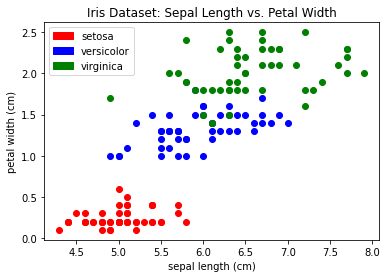

In [11]:
plt.figure()
# Different colors for each class:
#   red = setosa
#   blue = versicolor
#   green = virginica
colors = ['red', 'blue', 'green']
# now we'll loop over the points in our dataset, and plot them one at a time
for i in range(len(iris.data)):
    x = iris.data[i][0]
    y = iris.data[i][3]
    # use the target (which we know is 0, 1, or 2) to select the color for this point
    c = colors[iris.target[i]]
    # plot the point as a single point in a scatter graph
    plt.scatter(x, y, color=c)
# now let's add some axis labels; we'll use the names from the dataset
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
# if we want a key, we'll need to make "handles" attaching colors to names
red = mpatches.Patch(color='red', label='setosa')
blue = mpatches.Patch(color='blue', label='versicolor')
orange = mpatches.Patch(color='green', label='virginica')
plt.legend(handles=[red, blue, orange])
plt.title('Iris Dataset: Sepal Length vs. Petal Width')

If we see a novel iris plant with a sepal length of 5cm and a petal width of 0.25cm, we can reasonably assume that that plant is setosa species, since it falls in the middle of the red 'setosa' cluster (barring information about petal length, and sepal width for the sake of our example).

This is the basis for our intuition behind kNN, where new examples are given a label based on how close they are to known neighboring data points.

### Mathematical Intuition

For any given value of $k\in\mathbb{Z}$ where $k\geq1$, read as $k$ is a positive integer, we will find the $k$ nearest existing data points to our new unlabeled data point. For our distance measure, we will be calculating the Euclidean distance between two vectors $\mathbf{a}=[a_1\:\dots\:a_n]$, and $\mathbf{b}=[b_1\:\dots\:b_n]$ in the real Euclidean space $\mathbb{R}^n$ by a function $d:\mathbb{R}^n,\mathbb{R}^n\rightarrow\mathbb{R}$:

\begin{equation}
d(\mathbf{a},\mathbf{b})=\sqrt{(a_1-b_1)^2+\dots+(a_n-b_n)^2}
\label{eq:euclidean_dist} \tag{2.3}
\end{equation}

Alternatively, we could choose a different distance function, like Manhattan or Hamming distance with different results, but for the sake of simplicity Euclidean distance will suffice. There are often dozens of tunable **hyper-parameters** for a model; in this case, defining the distance function used by our kNN model.

Formally, we define kNN as the probability a novel feature vector $\mathbf{x}$ is classified by label $i$:

\begin{equation}
P(y=i|X=\mathbf{x})=\frac{1}{k}\sum_{\mathbf{j}\in N}I(y^{(\mathbf{j})}=i)
\label{eq:prob_knn}\tag{2.4}
\end{equation}

Let's break down \eqref{eq:prob_knn}, as there are many unknown variables and notations.

1. $P(y=i|X=\mathbf{x})$ is the conditional probability, read as "The probability of class label $i$ given example $\mathbf{x}\in X$". 
2. We have already defined $y$ as the set of class labels for all examples, thus $i\in y$. 
3. $k$ is the number of nearest neighbors we consider, and is the primary hyper-parameter we tune for this model. As stated above, $k$ must be a positive integer. 
4. $N$ is the set of $k$ existing examples closest to $\mathbf{x}$. Hence, $\mathbf{j}\in N$ are examples $\mathbf{j}$ belonging to $N$ that are close to $\mathbf{x}$. $y^{(\mathbf{j})}$ is the class label of existing example $\mathbf{j}$ as defined above.
5. $I$ is the indicator function, evaluating to 1 if $y^{(\mathbf{j})}=i$ is true, and 0 otherwise.

We can view the \eqref{eq:prob_knn} as follows: The probability that an example $\mathbf{x}$ is classified by label $i$ is equal to the $k$ labels in our dataset, $y$, that are close to $\mathbf{x}$ (ie. $y^{(\mathbf{j})}$ that also match classification $i$, divided by the total number of nearest neighbors, $k$.

Looking at mathematical notation can be a bit confusing. Over time, if you allow yourself to think through what the definitions mean it becomes much more powerful than the broader definition from the previous section.

### Algorithm

Here is a general algorithm for kNN:

1. Assume all examples are feature vectors in $\mathbb{R}^n$ space. (ie. they have real-valued features, since distance can't be calculated on non-real values!)
2. For each known example in the dataset, Calculate the distance between this point, and the novel example.
3. Record the distance into an array.
4. Sort by smallest distance, taking the first *k* distances.
5. Get the labels corresponding to the *k* smallest entries.
6. Return the most frequently seen of the *k* closest labels as the new class label.

### In Action

Let's explore kNN using the SciKit Learn model definition of [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html).

In [18]:
from math import sqrt
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split

In [19]:
# Defining a nearest neighbor classifier
# Note: Use 'n_neighbors' parameter to control the K in our KNN
kNN_classifier_1 = neighbors.KNeighborsClassifier(metric="euclidean", n_neighbors=1)
# Fit the data to our classifier, using data and target corresponding to the real data and class labels
kNN_classifier_1.fit(iris.data, iris.target)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Given a fitted classifier, we can now test how accurate it can predict novel examples:

In [20]:
# The result is the percentage of examples it gets right
kNN_classifier_1.score(iris.data, iris.target)

1.0

If you think this accuracy score seems a little too good to be true... you would be correct! The model is simply memorizing the training examples, and being fed the exact same examples in the testing phase. We aren't generalizing anything new in this case, just proving that our model is really good at recognizing 150 examples!

In order to get a real accuracy score, we need to split our dataset into a train and test set, so when we train our model we can test it's ability to generalize new inputs using the never-before-seen test set:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
print("Training Shape:", X_train.shape, ", Testing Shape:", X_test.shape)

Training Shape: (90, 4) , Testing Shape: (60, 4)


In [22]:
# TODO: Cell intentionally left to observe train_test_split characteristics. View data arrays (set X), and corresponding class labels (set y)
X_train[:5]

array([[6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3]])

Use this time to experiment splitting the dataset into separate train and test sets by something other than a 60/40 split, or changing the random_state and observe the first few examples (see how we view data in the section "Exploration of Data" above).

You should notice that the random_state field is essentially a "seed" value for the random number generator that splits our dataset. Regardless of how many times you run the train/test split on the 150 iris data points it will consistently return the same set of pseudo-random data. This is useful for splitting datasets to compare relative performance with other models (or even altered hyper-parameters in the same model). If chose not to set a random_state, then it is possible the data could be split in such a way that the training model would never see an example of a specific class (although highly unlikely), making algorithm comparisons unreliable.

Generally, the training split is higher than the testing split because we want more examples to train our model than to evaluate it's accuracy. This will become more obvious as we explore more models, so for now assume a test_size $\leq0.5$ as a best practice.

Now that we have a training set, let's re-fit our model:

In [23]:
kNN_classifier_2 = neighbors.KNeighborsClassifier(metric="euclidean", n_neighbors=1)
kNN_classifier_2.fit(X_train, y_train)
kNN_classifier_2.score(X_test, y_test)

0.9166666666666666

Now we are fitting our model correctly based on the training data and training labels, and evaluating the model on the test data and test labels. The score function will return an accuracy that is more realistic.

Applying kNN is quite simple, and provides a reasonable level of predictive accuracy on low-dimensional, tightly clustered datasets. As we will see in future sections, this algorithm will be out-classed by more powerful predictive algorithms, and is generally not performant on higher dimensional data.

## Problem: kNN

To practice, and demonstrate your mastery of kNN, you will implement your own kNN classifier. Using the SciKit Learn definition as a scaffolding, generate a kNN classifier method for the iris dataset achieving similar results. Make sure to test for different values of $k$.

First, create a Euclidean distance function based on our equation above, $d(\mathbf{a},\mathbf{b})$.

In [ ]:
def distance(a, b):
    # TODO: a, and b should be arrays. Using the formula defined above find the Euclidean distance between two same-length arrays.

Next, use the distance function in a custom kNN algorithm implementation below. Follow the algorithm steps above, and verify the accuracy of your model against the SciKit Learn implementation.

In [ ]:
def knn(train, train_labels, test, test_labels, k):
    # TODO: Given a split train/test set, associated labels, and integer k>=1, implement kNN. Use the distance function above to calculate distance between examples.